# This notebook explores a variety of training methods

## Imports 
<hr>

In [1]:
# %matplotlib widget
import numpy as np 
import matplotlib.pyplot as plt 
import math
import pandas as pd
from datetime import datetime

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.svm import SVR

In [3]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [4]:
def plotRegression(truth, pred):
    plt.figure(figsize=(10,10))
    plt.scatter(truth, pred)
    plt.grid()
    plt.xlabel("Truth")
    plt.ylabel("Predicted")
    plt.title("Truth Plotted against actual value")
    plt.plot([min(truth),max(truth)], [min(truth),max(truth)], 'r')
    plt.show()
    
def computeAverageError(pred, y):
    err = []
    for i in range(len(pred)):
        err.append(abs((y[i] - pred[i])/(y[i] + 1e-6)))

    return sum(err)/ len(err)

## Load the data and split into training and testing 
<hr>

In [5]:
############## This data has not been normalized/scaled at all ###################
dataUnscaled_filename = '/Users/brad/Desktop/CS6620/Project/Data/combined_processed_data1.csv' 
data = pd.read_csv(dataUnscaled_filename, sep=',')
y = data['Solar_average'].to_numpy()
x = data.drop(['Unnamed: 0', 'date_time', 'Solar_average', 'Solar_total', 'Count'], axis=1).to_numpy()

In [6]:
# ## Jarom's data
# dataUnscaled_filename = '/Users/brad/Desktop/CS6620/AICE/code/combined_data2.csv' 
# data = pd.read_csv(dataUnscaled_filename, sep=',')
# y = data['Solar_Power'].to_numpy()
# x = data.drop(['timestamp','Solar_Power'], axis=1).to_numpy()
# x = np.nan_to_num(x, copy=True)
# y = np.nan_to_num(y, copy=True)

In [7]:
train_length = int(x.shape[0] * 0.85)
x_train = x[0 : train_length].reshape(-1, x.shape[1])
y_train = y[0 : train_length].reshape(-1,1)
x_test = x[train_length : ].reshape(-1, x.shape[1])
y_test = y[train_length : ].reshape(-1,1)
print('After split and reshape')
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

After split and reshape
(4603, 39)
(4603, 1)
(813, 39)
(813, 1)


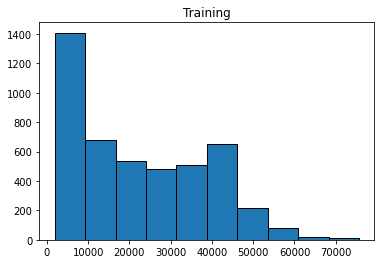

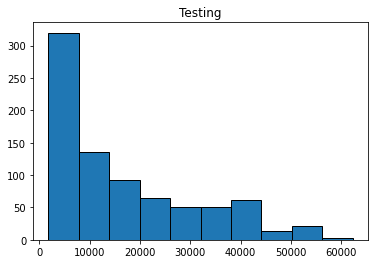

In [8]:
plt.figure()
plt.hist(y_train, edgecolor='black')
plt.title("Training")
plt.show()
plt.figure()
plt.hist(y_test, edgecolor='black')
plt.title("Testing")
plt.show()

## Explore different methods of scaling 
<hr>

In [9]:
# Scale 
# sc_X = StandardScaler()
# sc_y = StandardScaler()
# x_train = sc_X.fit_transform(x_train)
# x_test = sc_X.fit_transform(x_test)
# y_train = sc_y.fit_transform(y_train)
# y_test = sc_y.fit_transform(y_test)

In [10]:
# # MinMaxScale a different way
# scalerX = MinMaxScaler()
# scalerY = MinMaxScaler()
# x_train = scalerX.fit_transform(x_train)
# x_test = scalerX.fit_transform(x_test)
# y_train = scalerY.fit_transform(y_train)
# y_test = scalerY.fit_transform(y_test)

In [11]:
# Best results came from using quantile uniform 

# scalerX = QuantileTransformer(output_distribution='uniform')
scalerX = MinMaxScaler()
scalerX.fit(x_train)
x_train = scalerX.transform(x_train)
x_test = scalerX.transform(x_test)

scalerY = QuantileTransformer(output_distribution='uniform')
scalerY.fit(y_train)
y_train = scalerY.transform(y_train)
y_test = scalerY.transform(y_test)



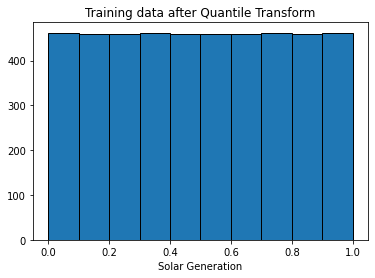

In [12]:
plt.figure()
plt.hist(y_train, edgecolor='black')
plt.title("Training data after Quantile Transform")
plt.xlabel("Solar Generation")
plt.show()

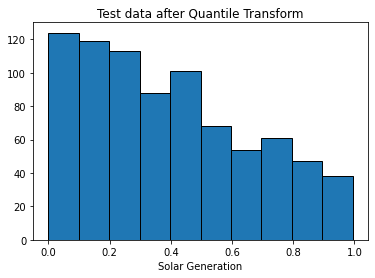

In [13]:
plt.figure()
plt.hist(y_test, edgecolor='black')
plt.xlabel("Solar Generation")
plt.title("Test data after Quantile Transform")
plt.show()

## Fit with KNN
<hr>

In [14]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from math import sqrt


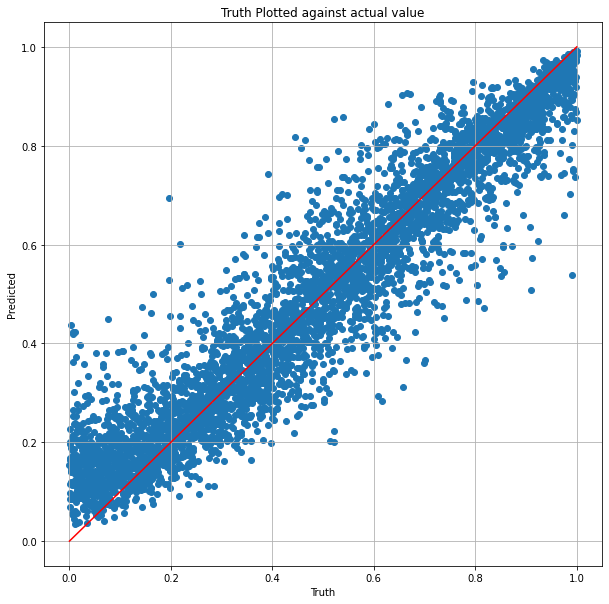

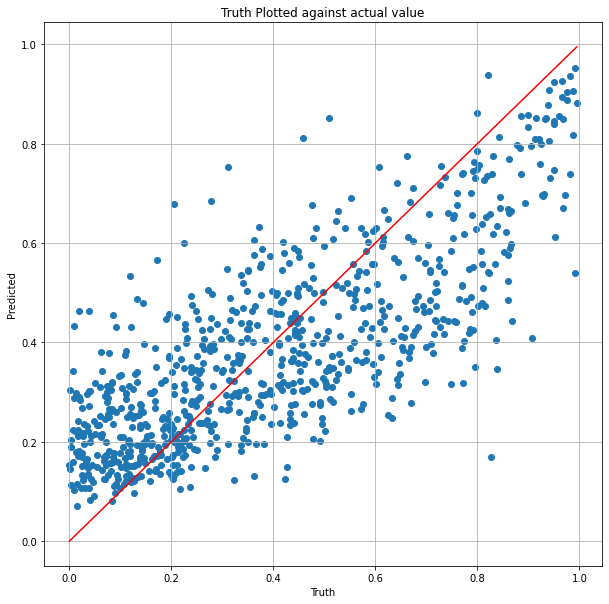

In [15]:
KNNmodel = neighbors.KNeighborsRegressor(n_neighbors = 9)
KNNmodel.fit(x_train, y_train)  #fit the model
test_pred_knn = KNNmodel.predict(x_test) #make prediction on test set
train_pred_knn = KNNmodel.predict(x_train)
plotRegression(y_train, train_pred_knn)
plotRegression(y_test, test_pred_knn)

In [16]:
print( r2_score(y_train, train_pred_knn) )
print( r2_score(y_test, test_pred_knn) )

0.9011411386463991
0.6044636496761477


## Try fitting the data with RandomForestRegressors
<hr>

In [17]:
regressor = RandomForestRegressor(n_estimators=100, random_state=2)
regressor.fit(x_train, y_train)

<ipython-input-17-4d35941cbd4c>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(x_train, y_train)


RandomForestRegressor(random_state=2)

In [18]:
# Training data r^2 value 
y_train_pred = regressor.predict(x_train)
r2_score(y_train, y_train_pred)

0.9903289275298613

In [19]:
# testing data r^2 value 
y_test_pred = regressor.predict(x_test)
r2_score(y_test, y_test_pred)

0.7895801342173532

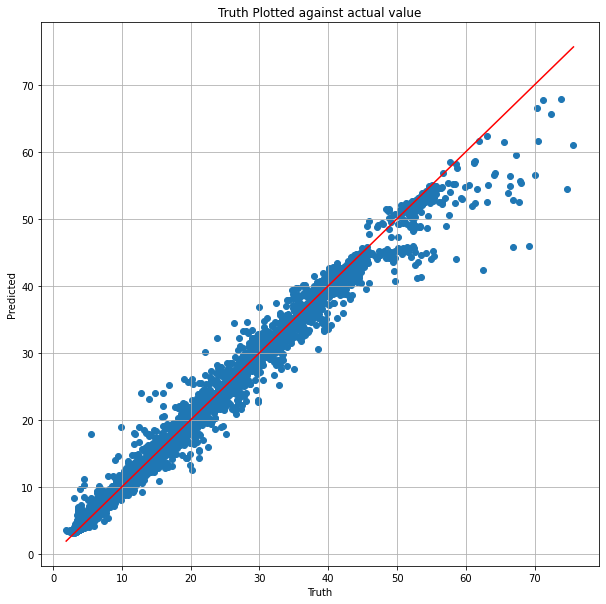

In [20]:
plotRegression(scalerY.inverse_transform(y_train.reshape(-1,1))/1000, scalerY.inverse_transform(y_train_pred.reshape(-1,1))/1000)

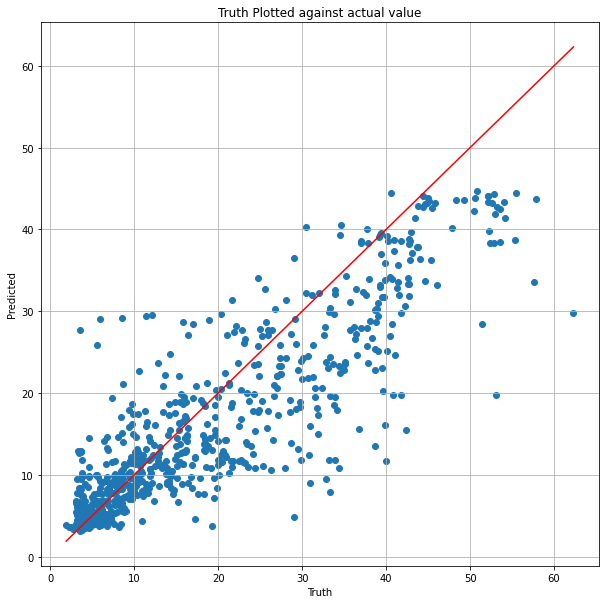

In [21]:
plotRegression(scalerY.inverse_transform(y_test.reshape(-1,1))/1000, scalerY.inverse_transform(y_test_pred.reshape(-1,1))/1000)

## Support Vector Regression 
<hr>

In [22]:
# sc_X = StandardScaler()
# sc_y = StandardScaler()
# x_train = sc_X.fit_transform(x_train)
# x_test = sc_X.fit_transform(x_test)
# y_train = sc_y.fit_transform(y_train)
# y_test = sc_y.fit_transform(y_test)

### Before transform, data has range () after transform, from from (-1,5) (Using Standard scaler)
### Using MinMaxScaler gives range between 0-1


In [23]:
x_train = x_train.reshape(-1, x_train.shape[1],)
x_test = x_test.reshape(-1, x_train.shape[1],)
# Reshape Y 
print('Before reshaping: ')
print(y_train.shape)
print(y_test.shape)

y_train = y_train.flatten()
y_test = y_test.flatten()
print('After reshaping: ')
print(y_train.shape)
print(y_test.shape)

Before reshaping: 
(4603, 1)
(813, 1)
After reshaping: 
(4603,)
(813,)


In [24]:
regressorSVR = SVR(kernel='poly')
regressorSVR.fit(x_train, y_train)

SVR(kernel='poly')

In [25]:
y_train_pred_svr = regressorSVR.predict(x_train)
y_test_pred_svr = regressorSVR.predict(x_test)

In [26]:
print(r2_score(y_train, y_train_pred_svr))
print(r2_score(y_test, y_test_pred_svr))

0.9363987712359997
0.7559122781422519


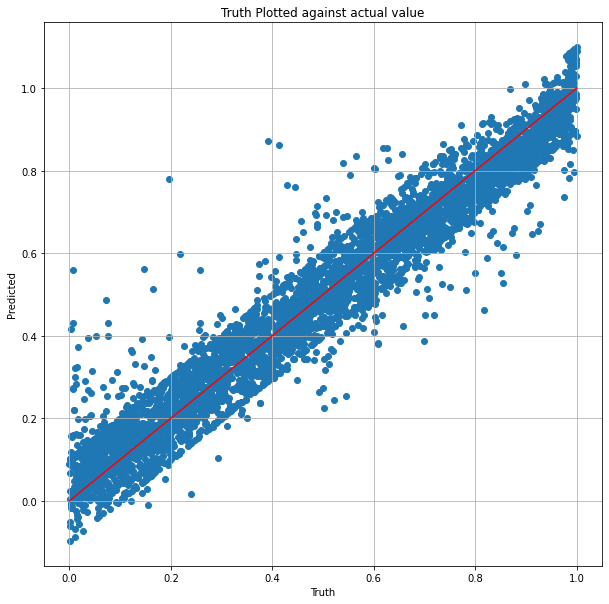

In [27]:
plotRegression(truth=y_train, pred=y_train_pred_svr)

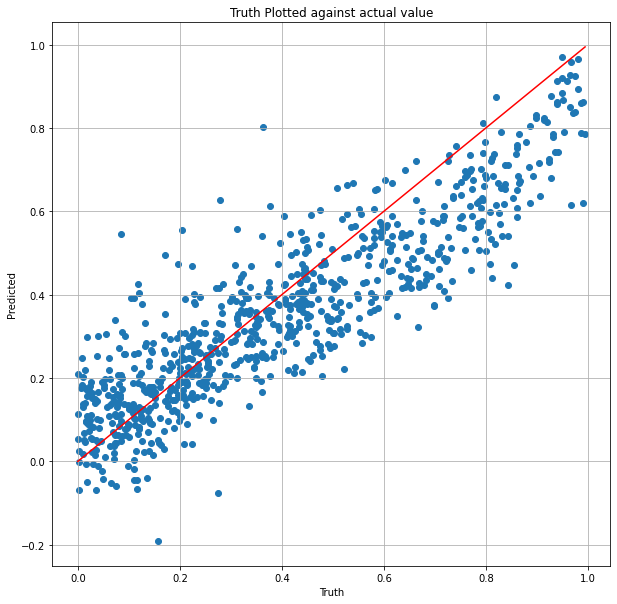

In [28]:
plotRegression(truth=y_test, pred=y_test_pred_svr)

## Using keras RNN and ANN
<hr>

In [29]:
import tensorflow as tf 
from tensorflow import keras
from keras import backend as K
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.layers.experimental import preprocessing

In [30]:
# not sure if this is right. 
def coeff_determination(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred )) 
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) ) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [31]:
# x_train = x_train.reshape(-1,x_train.shape[1],)
# x_test = x_test.reshape(-1,x_train.shape[1],)
# scalerX = MinMaxScaler()
# scalerX.fit(x_train)
# x_train = scalerX.transform(x_train)
# x_test = scalerX.transform(x_test)

In [32]:
#LSTM model
model = Sequential()
model.add(LSTM(10, input_shape=(x_train.shape[1],1), return_sequences=True))
model.add(Dropout(0.2))
# model.add(LSTM(128, activation='relu', return_sequences=True))
# model.add(Dropout(0.2))
model.add(LSTM(10, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='relu'))
# optimizer 
opt = tf.keras.optimizers.Adam(learning_rate=0.001, decay=1e-5)
# compile
# mean_squared_error
# mean_absolute_error
model.compile(loss='mean_absolute_error', optimizer=opt, metrics=[coeff_determination])

In [33]:
def plot_loss(history):
  plt.figure()
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.grid(True)
  plt.show()
  plt.figure()
  plt.plot(history.history['coeff_determination'], label='R^2')
  plt.plot(history.history['val_coeff_determination'], label='validation R^2')
  plt.xlabel('Epoch')
  plt.ylabel('R^2')
  plt.legend()
  plt.show()

In [34]:
x_train = x_train.reshape(-1,x_train.shape[1],1)
x_test = x_test.reshape(-1,x_train.shape[1],1)

In [35]:
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

oeff_determination: 0.7010 - val_loss: 0.1538 - val_coeff_determination: 0.3552
Epoch 131/250
72/72 [==============================] - 1s 17ms/step - loss: 0.1172 - coeff_determination: 0.7156 - val_loss: 0.1461 - val_coeff_determination: 0.3934
Epoch 132/250
72/72 [==============================] - 1s 17ms/step - loss: 0.1201 - coeff_determination: 0.6984 - val_loss: 0.1476 - val_coeff_determination: 0.3864
Epoch 133/250
72/72 [==============================] - 1s 17ms/step - loss: 0.1171 - coeff_determination: 0.7054 - val_loss: 0.1506 - val_coeff_determination: 0.3697
Epoch 134/250
72/72 [==============================] - 1s 18ms/step - loss: 0.1199 - coeff_determination: 0.7138 - val_loss: 0.1507 - val_coeff_determination: 0.3777
Epoch 135/250
72/72 [==============================] - 1s 16ms/step - loss: 0.1195 - coeff_determination: 0.7082 - val_loss: 0.1512 - val_coeff_determination: 0.3794
Epoch 136/250
72/72 [==============================] - 1s 17ms/step - loss: 0.1223 - coeff

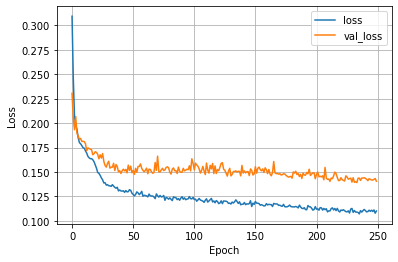

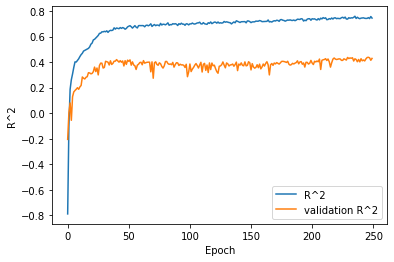

In [36]:
history= model.fit(x=x_train, y=y_train, epochs=250, validation_data=(x_test, y_test),batch_size=64,verbose=1)
plot_loss(history)

In [37]:
model.save(f"/Users/brad/Desktop/CS6620/Project/models/rnn_model{str(datetime.now())}.h5")

In [38]:
y_pred_train_LSTM = model.predict(x_train)
print(r2_score(y_train, y_pred_train_LSTM))
y_pred_test_LSTM = model.predict(x_test)
print(r2_score(y_test, y_pred_test_LSTM))

0.8308516091942095
0.5569924490465017


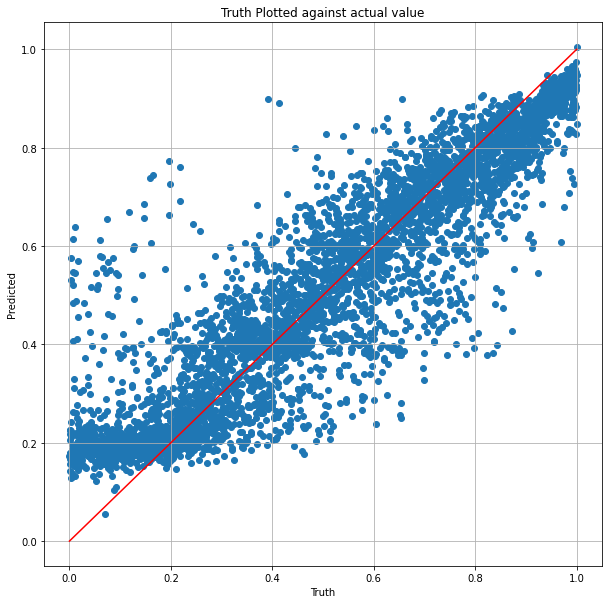

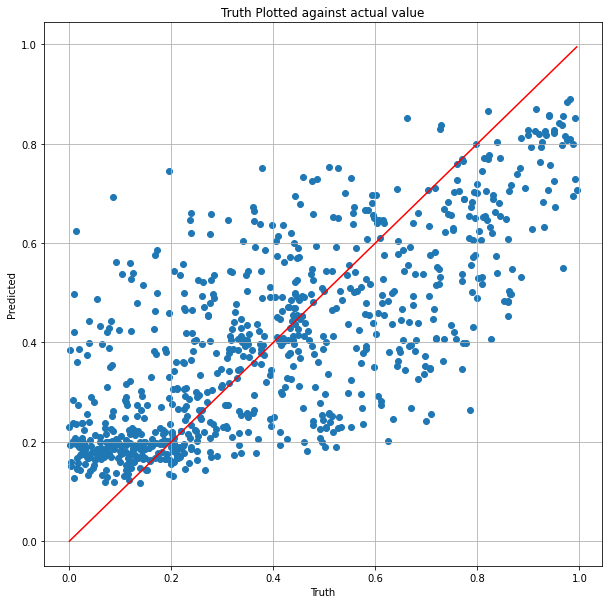

In [39]:
plotRegression(y_train, y_pred_train_LSTM)
plotRegression(y_test, y_pred_test_LSTM)

In [40]:
# ann Model
ann_model = Sequential()
ann_model.add(Dense(20, input_dim=x_train.shape[1], activation='relu'))
ann_model.add(Dropout(0.2))
ann_model.add(Dense(10, activation='relu'))
ann_model.add(Dropout(0.2))
# ann_model.add(Dense(10, activation='relu'))
# ann_model.add(Dropout(0.2))
# ann_model.add(Dense(10, activation='relu'))
ann_model.add(Dense(1, activation='relu'))
# optimizer 
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
# compile
# mean_squared_error
# mean_absolute_error
ann_model.compile(loss='mean_absolute_error', optimizer=opt, metrics=[coeff_determination])

In [41]:
History = ann_model.fit(x=x_train.reshape(-1,x_train.shape[1], ), y=y_train.reshape(-1,), epochs=400, validation_data=(x_test.reshape(-1,x_train.shape[1], ), y_test.reshape(-1,)),batch_size=50,verbose=0)

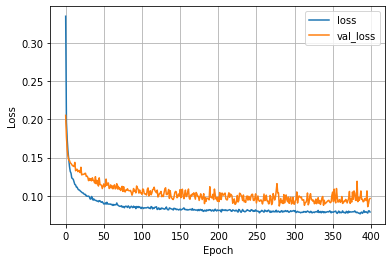

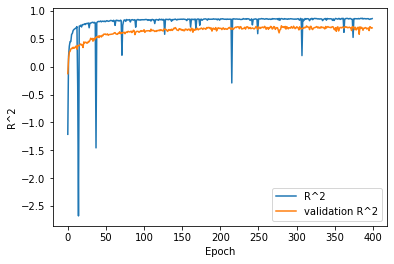

In [42]:
plot_loss(History)

num = 0
while num < 10:
    history= ann_model.fit(x=x_train.reshape(-1,x_train.shape[1], ), y=y_train.reshape(-1,), epochs=100, validation_data=(x_test.reshape(-1,x_train.shape[1], ), y_test.reshape(-1,)),batch_size=64,verbose=0)
    plot_loss(history)
    y_pred_train_ann = model.predict(x_train)
    print(r2_score(y_train, y_pred_train_ann))
    y_pred_test_ann = model.predict(x_test)
    print(r2_score(y_test, y_pred_test_ann))
    num += 1


In [43]:
y_pred_train_ann = ann_model.predict(x_train.reshape(-1,x_train.shape[1], ))
print(r2_score(y_train, y_pred_train_ann))
y_pred_test_ann = ann_model.predict(x_test.reshape(-1,x_train.shape[1], ))
print(r2_score(y_test, y_pred_test_ann))

0.9188423139012443
0.7891204589926896


In [44]:
ann_model.save(f"/Users/brad/Desktop/CS6620/Project/models/ann_model{str(datetime.now())}.h5")

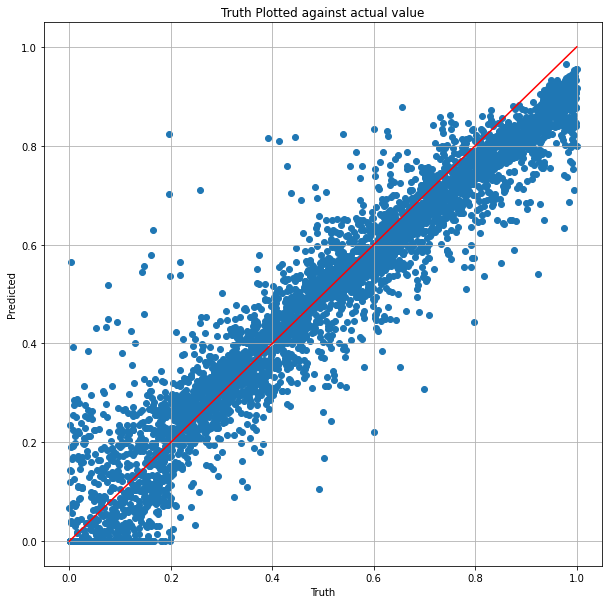

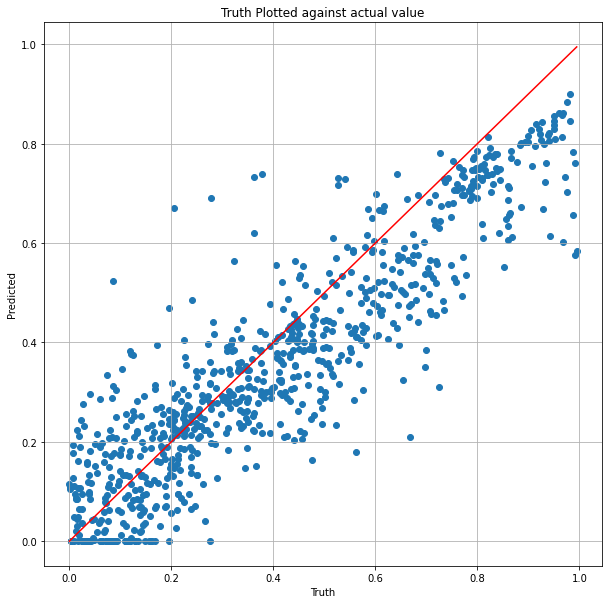

In [45]:
plotRegression(y_train, y_pred_train_ann)
plotRegression(y_test, y_pred_test_ann)

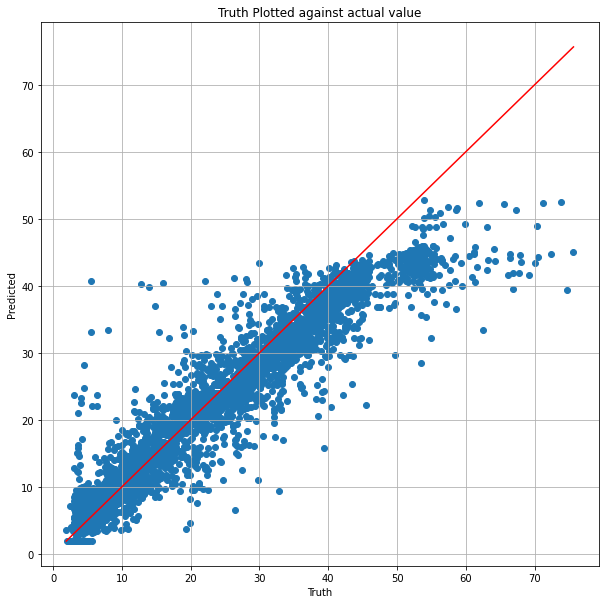

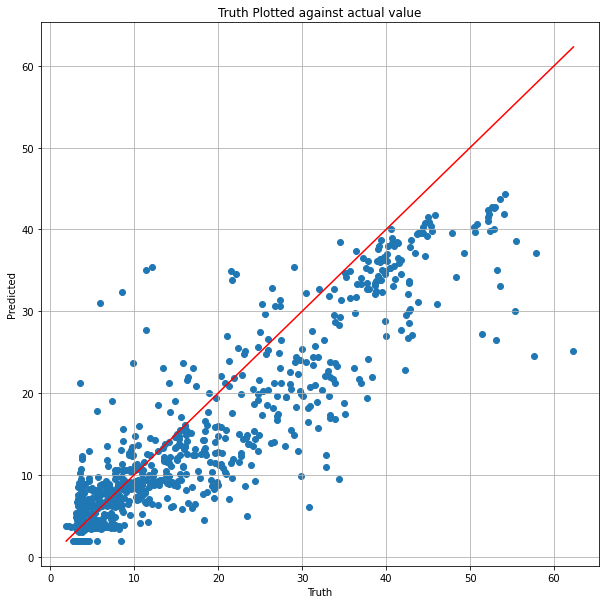

In [46]:
plotRegression(scalerY.inverse_transform(y_train.reshape(-1,1))/1000, scalerY.inverse_transform(y_pred_train_ann.reshape(-1,1))/1000)
plotRegression(scalerY.inverse_transform(y_test.reshape(-1,1))/1000, scalerY.inverse_transform(y_pred_test_ann.reshape(-1,1))/1000)